1. Importul bibliotecilor




In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from textblob import TextBlob
import plotly.express as px

2. Extragerea datelor de pe booking.com

In [4]:
#soup = BeautifulSoup(request.text, 'lxml')
import numpy as np

#cautare in mai multe pagini pentru reviews
url_baza = "https://www.booking.com/reviews/ae/hotel/holiday-inn-dubai-festival-city.en-gb.html?aid=357028&label=bin859jc-1FEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AEB6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBeACAQ&sid=e93efe2d7e206ad7efa9e6711bc1cdd2&customer_type=total&hp_nav=0&old_page=0&order=featuredreviews&page="
url_iterat = ["{}{};r_lang=en;rows=75&".format(url_baza, str(pagina)) for pagina in range(0,30)]
#exista mai multe pagini cu review-uri lasate de clienti
#vom itera prin aceste pagini si le vom accesa pentru a prelua data review-ului, datele review-urilor si numele celor care au lasat reviews
pagini=[]
for element in url_iterat:
    pagini.append(element)

#listele ce vor contine informatiile despre clientii care au lasat review-urile
continuturi = []
punctaje = []
nume_reviewers = []
review_pozitive = []
review_negative = []
review_generale = []

#pentru fiecare pagina din vectorul de pagini
for pagina in pagini:
    #realizam un request get pentru pagina respectiva
    request_temp = requests.get(pagina, verify = False)

    #folosim BS pentru a obtine informatiile din request-ul anterior
    temp_soup = BeautifulSoup(request_temp.text, 'lxml')

    #preluarea fiecarui tip de continut si inserarea lui in lista corespunzatoare
    continut= [x.get_text(strip=True) if pd.isna(x) != True else ' '  for x in temp_soup.find_all("div", {"class": "review_item_review_content"}) ]
    scor= [x.get_text(strip=True) if pd.isna(x) != True else ' '  for x in temp_soup.find_all("span", {"class": "review-score-badge"}) ] 
    nume_reviewer= [x.get_text(strip=True) if pd.isna(x) != True else ' '  for x in temp_soup.find_all("p", {"class": "reviewer_name"}) ]
    
    preview_pozitiv = [x.get_text(strip = True) if pd.isna(x) != True else ' ' for x in temp_soup.find_all('p',{'class':'review_pos'})]
    review_negativ = [x.get_text(strip = True) if pd.isna(x) != True else ' ' for x in temp_soup.find_all('p',{'class':'review_neg'})]
    review_general = [x.get_text(strip = True) if pd.isna(x) != True else ' ' for x in temp_soup.find_all('div',{'class':'review_item_header_content'})]
    
    review_pozitive.append(preview_pozitiv)
    review_generale.append(review_general)
    review_negative.append(review_negativ)
    continuturi.append(continut)
    punctaje.append(scor[1:])
    nume_reviewers.append(nume_reviewer)

C:\Users\Alin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.booking.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\Alin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.booking.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\Alin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.booking.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\Alin\anaconda3\lib\site-packages\urllib3\connectionp

C:\Users\Alin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.booking.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\Alin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.booking.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\Alin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.booking.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\Alin\anaconda3\lib\site-packages\urllib3\connectionp

C:\Users\Alin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.booking.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\Alin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.booking.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\Alin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.booking.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\Alin\anaconda3\lib\site-packages\urllib3\connectionp

In [25]:
#creare pandas dataframe pentru datele obtinute
#folosim itertools pentru o iterare mai rapida prin listele create
coloana_continut = list(itertools.chain(*continuturi))
coloana_scor = list(itertools.chain(*punctaje))
coloana_nume = list(itertools.chain(*nume_reviewers))
coloana_pozitive = list(itertools.chain(*review_pozitive))
coloana_negative = list(itertools.chain(*review_negative))
coloana_generale = list(itertools.chain(*review_generale))

df=pd.DataFrame(coloana_scor,columns=['Scor'])
df['Continut']=coloana_continut
df['Nume']=coloana_nume
df['General review'] = coloana_generale

df_reviews_pozitive = pd.DataFrame(coloana_pozitive, columns = ['Pozitive'])
df_reviews_negative = pd.DataFrame(coloana_negative, columns = ['Negative'])

df.to_csv('HotelReviewsDubai.csv', index=False, header=True) #fisier csv ce contine datele


3. NLP pe dataframe-ul creat. Analiza sentimentului cu privire la locatia aleasa din Dubai (Sentiment Analysis).

In [26]:
df

,Scor,Continut,Nume,General review
0,9.0,NilGood polite helpful staffStayed in May 2023,Wee,“Excellent”
1,10,Room cleaning service needs more attention to ...,Fouad,Exceptional
2,9.0,room fragrance they are usingevery thing was p...,Ashraf,“It was really wonderful”
3,10,"staff is friendly , espically reception and ve...",Ali,"“friendly , helpful, clean”"
4,8.0,"Great location, convenient for shopping at Fes...",Yasmanee,Very good
...,...,...,...,...
743,6.0,There are no comments available for this revie...,Ahmed,Pleasant
744,1.0,There are no comments available for this revie...,Ramzi,Very poor
745,6.0,There are no comments available for this revie...,Mansour,Pleasant
746,6.0,There are no comments available for this revie...,Mohamad,Pleasant


In [7]:
!pip install transformers

You should consider upgrading via the 'C:\Users\Alin\anaconda3\python.exe -m pip install --upgrade pip' command.


In [8]:
# df['Scor'] = pd.to_numeric(df['Scor'])
# print(df['Scor'])
# df = df.sort_values(by='Scor', ascending = True)

# print(df)

In [42]:
import transformers
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model = "finiteautomata/bertweet-base-sentiment-analysis")
data = list(df['General review'])
lista_dict = sentiment_pipeline(data)

negative = 0
pozitive = 0
for elem in lista_dict:
  if elem['label'] == "NEGATIVE":
    negative += 1
  else:
    pozitive += 1

if negative > pozitive:
  print("Majoritate review-uri negative")
else:
  print("Majoritate review-uri pozitive")


C:\Users\Alin\anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning:

`huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Alin\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development



All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at finiteautomata/bertweet-base-sentiment-analysis.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


Majoritate review-uri pozitive


In [46]:
lista_scoruri_nlp = []
labels = []
for dict in lista_dict:
    lista_scoruri_nlp.append(dict['score'])
    labels.append(dict['label'])

df['Scoruri NLP'] = lista_scoruri_nlp
df['Label'] = labels



In [56]:
df.loc[df['Label'] == 'POS', 'Label'] = 'POSITIVE'
df.loc[df['Label'] == 'NEG', 'Label'] = 'NEGATIVE'
df.loc[df['Label'] == 'NEU', 'Label'] = 'NEUTRAL'

<AxesSubplot:>

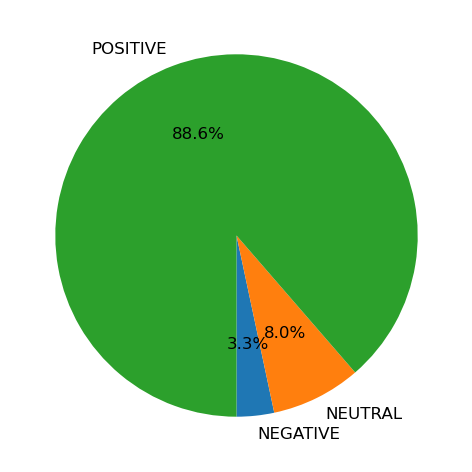

In [57]:
df1 = df.groupby(['Label']).size()
df1
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
df1.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

In [48]:
def polaritate(review):
    return TextBlob(review).sentiment.polarity

def subiectivitate(review):
    return TextBlob(review).sentiment.subjectivity

def analiza_textblob(scor):
    if scor == 0:
        return 'NEUTRAL'
    elif scor > 0:
        return 'POSITIVE'
    else:
        return 'NEGATIVE'

# def review_neutre(scor_polaritate):
#     if scor_polaritate == 0:
#         return 'NEUTRAL'
    

df['Polarity'] = df['General review'].apply(polaritate)
df['Subjectivity'] = df['General review'].apply(subiectivitate)
df['TextBlob Analysis'] = df['Polarity'].apply(analiza_textblob)
# df['Label'] = df['Polaritate'].apply(review_neutre)
# df.loc[df['Polarity'] == 0, 'Label'] = 'NEUTRAL'



In [49]:
df

,Scor,Continut,Nume,General review,Scoruri NLP,Label,Polarity,Subjectivity,TextBlob Analysis
0,9.0,NilGood polite helpful staffStayed in May 2023,Wee,“Excellent”,0.980061,POS,1.000000,1.000000,POSITIVE
1,10,Room cleaning service needs more attention to ...,Fouad,Exceptional,0.988038,POS,0.666667,1.000000,POSITIVE
2,9.0,room fragrance they are usingevery thing was p...,Ashraf,“It was really wonderful”,0.991215,POS,1.000000,1.000000,POSITIVE
3,10,"staff is friendly , espically reception and ve...",Ali,"“friendly , helpful, clean”",0.984973,POS,0.370833,0.600000,POSITIVE
4,8.0,"Great location, convenient for shopping at Fes...",Yasmanee,Very good,0.984218,POS,0.910000,0.780000,POSITIVE
...,...,...,...,...,...,...,...,...,...
743,6.0,There are no comments available for this revie...,Ahmed,Pleasant,0.738055,NEU,0.733333,0.966667,POSITIVE
744,1.0,There are no comments available for this revie...,Ramzi,Very poor,0.951738,NEG,-0.520000,0.780000,NEGATIVE
745,6.0,There are no comments available for this revie...,Mansour,Pleasant,0.738055,NEU,0.733333,0.966667,POSITIVE
746,6.0,There are no comments available for this revie...,Mohamad,Pleasant,0.738055,NEU,0.733333,0.966667,POSITIVE


In [75]:
fig1 = px.scatter(df, 
                 x='Polarity', 
                 y='Subjectivity', 
                 color = 'TextBlob Analysis',
                 size='Subjectivity')


In [76]:
# fig.update_layout(title='Sentiment Analysis',
#                   shapes=[dict(type= 'line',
#                                yref= 'paper', y0= 0, y1= 1, 
#xref= 'x', x0= 0, x1= 0)])
dictionary = {}
dictionary['color'] = 'Red'
fig1.add_shape(type='line',
                x0=0,
                y0=0,
                x1=0,
                y1=1,
                line=dictionary,
                xref='x',
                yref='paper'
)
fig1.show()

In [77]:
fig2 = px.scatter(df, 
                 x='Polarity', 
                 y='Subjectivity', 
                 color = 'Label',
                 size='Subjectivity')

In [79]:
dictionary2 = {}
dictionary2['color'] = 'Red'
fig2.add_shape(type='line',
                x0=0,
                y0=0,
                x1=0,
                y1=1,
                line=dictionary2,
                xref='x',
                yref='paper'
)
fig2.show()

<AxesSubplot:>

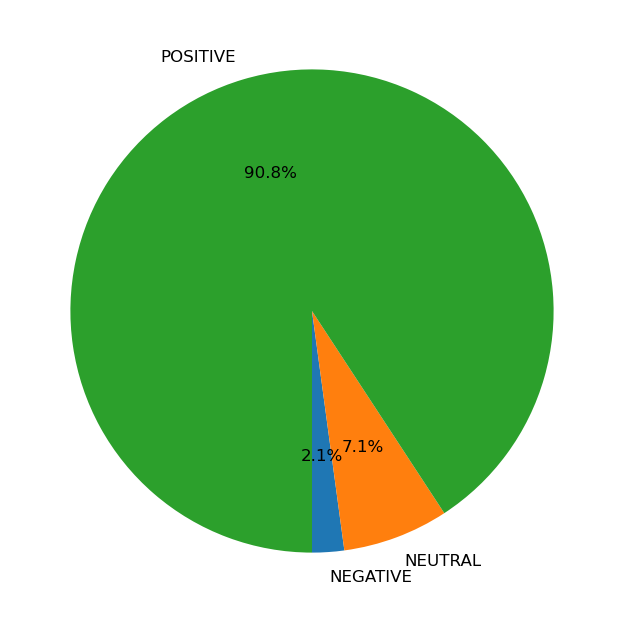

In [53]:
df2 = df.groupby(['TextBlob Analysis']).size()
df2
fig = plt.figure(figsize=(8,8), dpi=100)
ax = plt.subplot(111)
df2.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")